<a href="https://colab.research.google.com/github/knayani16/PDS-3/blob/main/PDS_Assign_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

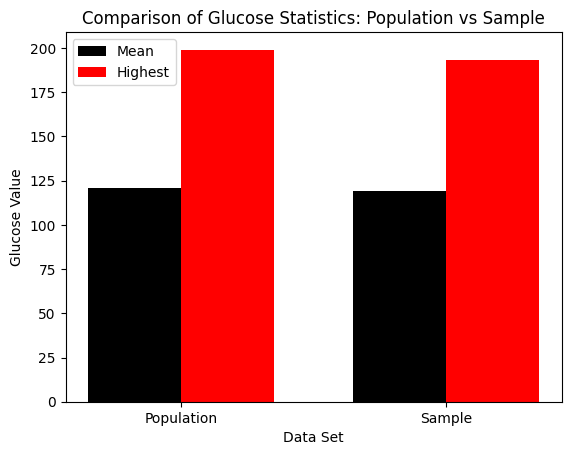

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

np.random.seed(45)

sample = data.sample(n=25)

population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

labels = ['Population', 'Sample']
means = [population_mean_glucose, sample_mean_glucose]
highest_values = [population_highest_glucose, sample_highest_glucose]

bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()
bar1 = ax.bar(index, means, bar_width, label='Mean', color='black')
bar2 = ax.bar(index + bar_width, highest_values, bar_width, label='Highest', color='red')

ax.set_xlabel('Data Set')
ax.set_ylabel('Glucose Value')
ax.set_title('Comparison of Glucose Statistics: Population vs Sample')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Population 98th Percentile BMI: 47.52599999999996
Sample 98th Percentile BMI: 46.980000000000004


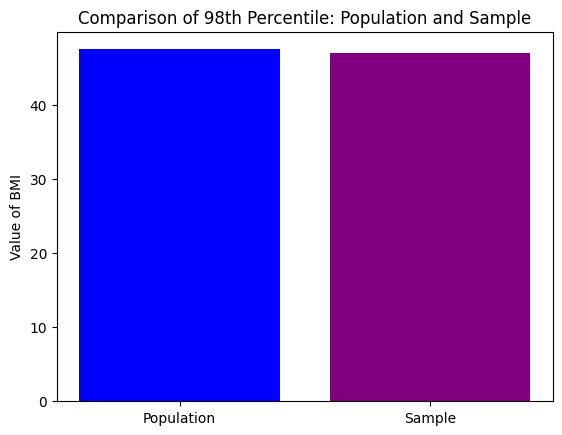

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

np.random.seed(45)

sample = data.sample(n=35)

bmi_population_98th_percentile = np.percentile(data['BMI'], 98)
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)

print("Population 98th Percentile BMI:", bmi_population_98th_percentile)
print("Sample 98th Percentile BMI:", sample_98th_percentile_bmi)

labels = ['Population', 'Sample']
values = [bmi_population_98th_percentile, sample_98th_percentile_bmi]

plt.bar(labels, values, color=['blue', 'purple'])
plt.title('Comparison of 98th Percentile: Population and Sample')
plt.ylabel('Value of BMI')
plt.show()


Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.355807170644777
Population 90th Percentile BloodPressure: 88.0

Average Bootstrap Mean BloodPressure: 69.20698666666667
Average Bootstrap Standard Deviation BloodPressure: 19.018291942063982
Average Bootstrap 90th Percentile BloodPressure: 87.35579999999999


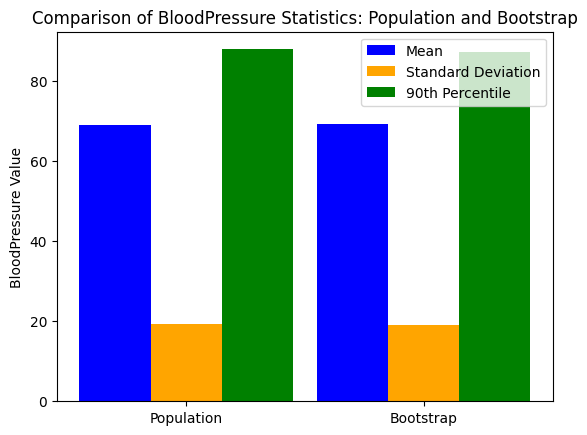

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

np.random.seed(45)

num_samples = 500
sample_size = 150
bootstrap_samples = []

for _ in range(num_samples):
    bootstrap_sample = np.random.choice(data['BloodPressure'], size=sample_size, replace=True)
    bootstrap_samples.append(bootstrap_sample)

population_mean_bp = data['BloodPressure'].mean()
population_std_dev_bp = data['BloodPressure'].std()
population_percentile_90_bp = np.percentile(data['BloodPressure'], 90)

bootstrap_means = np.mean(bootstrap_samples, axis=1)
bootstrap_standard_deviation = np.std(bootstrap_samples, axis=1)
bootstrap_percentiles_90 = np.percentile(bootstrap_samples, 90, axis=1)

print("Population Mean BloodPressure:", population_mean_bp)
print("Population Standard Deviation BloodPressure:", population_std_dev_bp)
print("Population 90th Percentile BloodPressure:", population_percentile_90_bp)

average_bootstrap_mean = np.mean(bootstrap_means)
average_bootstrap_standard_deviation = np.mean(bootstrap_standard_deviation)
average_bootstrap_percentile_90 = np.mean(bootstrap_percentiles_90)

print("\nAverage Bootstrap Mean BloodPressure:", average_bootstrap_mean)
print("Average Bootstrap Standard Deviation BloodPressure:", average_bootstrap_standard_deviation)
print("Average Bootstrap 90th Percentile BloodPressure:", average_bootstrap_percentile_90)

labels = ['Population', 'Bootstrap']
values_mean = [population_mean_bp, average_bootstrap_mean]
values_std_dev = [population_std_dev_bp, average_bootstrap_standard_deviation]
values_percentile_90 = [population_percentile_90_bp, average_bootstrap_percentile_90]

width = 0.3
index = np.arange(len(labels))

plt.bar(index - width, values_mean, width, label='Mean', color='blue')
plt.bar(index, values_std_dev, width, label='Standard Deviation', color='orange')
plt.bar(index + width, values_percentile_90, width, label='90th Percentile', color='green')

plt.ylabel('BloodPressure Value')
plt.title('Comparison of BloodPressure Statistics: Population and Bootstrap')
plt.xticks(index, labels)
plt.legend()
plt.show()
